In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [14]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [15]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.751272,-2.685156,0.724723,0.353571,-1.583003,0
1,-0.558780,1.008388,2.622168,0.083117,0.067721,1
2,0.621678,-1.728634,1.359952,1.199982,-0.261150,0
3,-1.340562,0.746456,0.667430,-1.776726,1.015276,1
4,0.330841,-0.740257,1.981241,-0.268592,-0.828992,0


In [ ]:
def row_sampling(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

# if df.shape = (10,4) and percent = 0.25
# then df.sample(int(0.25*10)) = df.sample(int(2.5)) = 2 rows selected in sample.

In [17]:
def feature_sampling(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

# since we want random input features and target column always, we apply sampling on input features only and seperately add target column.

In [ ]:
random.sample(df.columns.tolist()[:-1],3)

['col4', 'col1', 'col2']

In [22]:
def combined_sampling(df,row_percent,col_percent):
    new_df = row_sampling(df,row_percent)
    return feature_sampling(new_df,col_percent)

In [25]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4496\594864825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [26]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4496\594864825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [27]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4496\594864825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [28]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col4', 'target'], dtype='object')
Index(['col3', 'col1', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')


In [29]:
df2.sample(5)

,col3,col1,target
38,-2.029488,-3.816457,0
89,2.747310,-1.036586,1
54,-2.385069,-2.665081,1
15,1.898825,-0.668177,1
29,1.540386,-0.140467,0


In [31]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [32]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [33]:
from sklearn.tree import plot_tree

[Text(0.18181818181818182, 0.9375, 'x[1] <= -0.849\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.09090909090909091, 0.8125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.2727272727272727, 0.8125, 'x[0] <= -0.791\ngini = 0.353\nsamples = 35\nvalue = [27, 8]'),
 Text(0.18181818181818182, 0.6875, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.36363636363636365, 0.6875, 'x[0] <= -0.23\ngini = 0.472\nsamples = 21\nvalue = [13, 8]'),
 Text(0.18181818181818182, 0.5625, 'x[1] <= 1.154\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.09090909090909091, 0.4375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.2727272727272727, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5454545454545454, 0.5625, 'x[0] <= 0.218\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.45454545454545453, 0.4375, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.6363636363636364, 0.4375, 'x[1] <= 0.464\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.545454545454

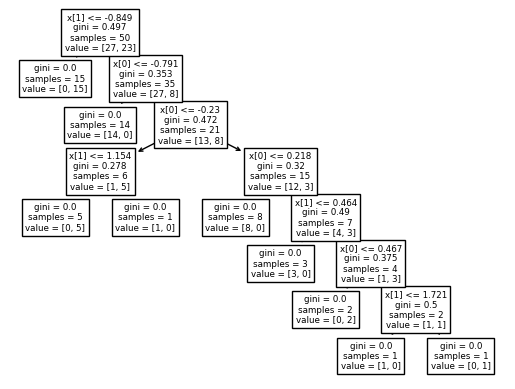

In [34]:
plot_tree(clf1)

[Text(0.5666666666666667, 0.9375, 'x[1] <= -1.224\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.3333333333333333, 0.8125, 'x[1] <= -1.786\ngini = 0.355\nsamples = 26\nvalue = [20, 6]'),
 Text(0.2, 0.6875, 'x[1] <= -1.871\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.13333333333333333, 0.5625, 'x[0] <= -2.207\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.06666666666666667, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.4375, 'x[0] <= -0.561\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.13333333333333333, 0.3125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.26666666666666666, 0.3125, 'x[0] <= 1.03\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.26666666666666666, 0.5625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4666666666666667, 0.6875, 'x[1] <= -1.333\ngini = 0.133\nsamples 

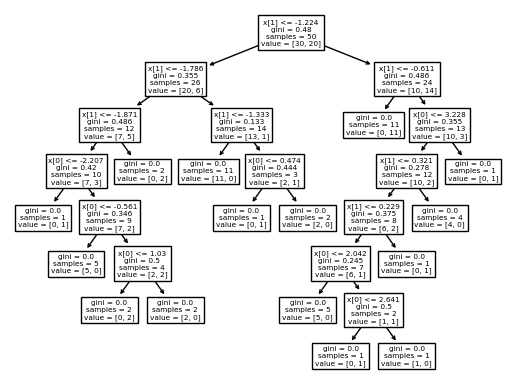

In [35]:
plot_tree(clf2)

[Text(0.5416666666666666, 0.9166666666666666, 'x[0] <= -0.138\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.25, 0.75, 'x[0] <= -2.536\ngini = 0.175\nsamples = 31\nvalue = [28, 3]'),
 Text(0.16666666666666666, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[0] <= -1.52\ngini = 0.124\nsamples = 30\nvalue = [28, 2]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[1] <= -1.673\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.4166666666666667, 'x[1] <= -2.661\ngini = 0.071\nsamples = 27\nvalue = [26, 1]'),
 Text(0.4166666666666667, 0.25, 'x[1] <= -3.479\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(

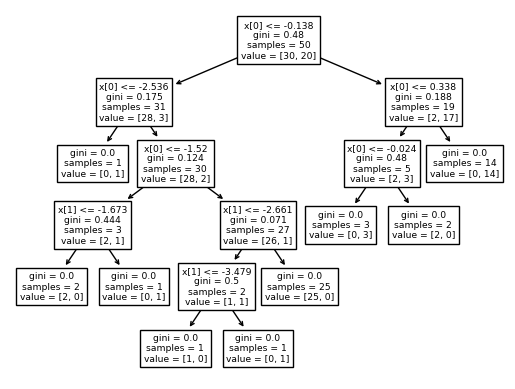

In [36]:
plot_tree(clf3)

In [ ]:
# 2.747310	-1.036586	1 -> picked up this row with index 89 from df.sample(5) in the above cell.
# we can see the target value is 1.
# now let's see the predicted target value for all 3 D.T. Classifiers

In [38]:
clf1.predict(np.array([2.747310,-1.036586]).reshape(1,2))

c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [40]:
clf2.predict(np.array([2.747310,-1.036586]).reshape(1,2))

c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [41]:
clf3.predict(np.array([2.747310,-1.036586]).reshape(1,2))

c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])